1.1 Use LASSO regression to predict Salary from the other numeric predictors.(you should omit the categorical predictors)
1.1.1. Create a visualization of the coefficient trajectories


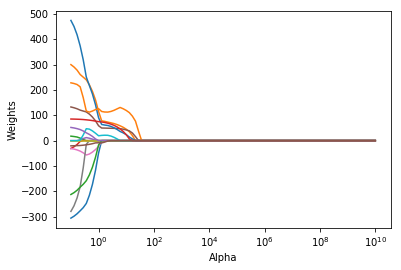

1.1.2. Comment on which are the final three predictors that remain in the model


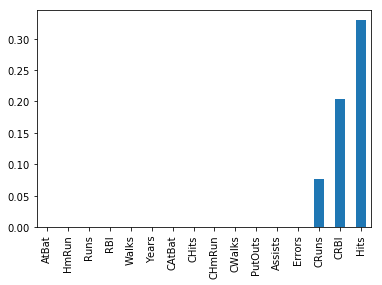

As we can see in the plot above, the final three predictors are Hits, HmRun and CRuns. They all have strong positive correlation with Salary.
1.1.3. Use cross-validation to find the optimal value of the regularization penalty
The optimal value of the penalty with Lasso Cross Validation:  0.157413684232
Lasso MSE with best Alpha is  94830.1458905
1.1.4. How many predictors are left in that model?
There are only 3 predictors left in the model.
1.2 Repeat with Ridge Regression. 
Visualization of the coefficient trajectories with Ridge


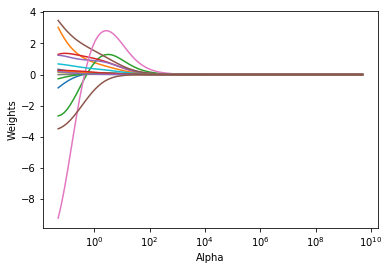

Final predictors that remain in the Ridge model are Error, CAtBat, CHits, CWalks, CRBI, CRuns, AtBat, CHmRun, Hits, RBI, Runs, Walks, HmRun, and Years
1.2.1 Visualize the coefficient trajectories


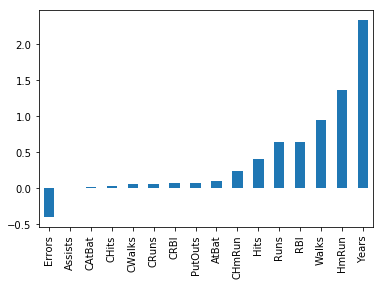

1.2.2 Use cross-validation to find the optimal value of the regularization penalty
The optimal value of the penalty with Ridge Cross Validation: 0.05
Ridge MSE with best Alpha 82686.3660863


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

%matplotlib inline

df = pd.read_csv("Hitters.csv", sep=",")
MAX_ITER = 30000
CV_FOLDER = 15
TEST_SIZE = 0.2
LASSO_ALPHA = 10
RIDGE_ALPHA = 4

df = df.select_dtypes([np.number]).dropna()
y = df['Salary']
x = df.drop(['Salary'], axis=1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE)


print("1.1 Use LASSO regression to predict Salary from the other numeric predictors.(you should omit the categorical predictors)") 
 
lasso=Lasso(normalize=True)

lasso_coefs = []

alphas = 10 ** np.linspace(10, -1, 100) * 0.5

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(scale(x_train), y_train)
    lasso_coefs.append(lasso.coef_)

print("1.1.1. Create a visualization of the coefficient trajectories")

ax = plt.gca()
ax.plot(alphas * 2, lasso_coefs)
ax.set_xscale('log')
plt.axis('Tight')
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.show()


print("1.1.2. Comment on which are the final three predictors that remain in the model")
lasso = Lasso(alpha=LASSO_ALPHA, max_iter=MAX_ITER, normalize=True)
lasso.fit(x, y)
pd.Series(lasso.coef_, index=x.columns).sort_values().plot(kind='bar')
plt.show()
print("As we can see in the plot above, the final three predictors are Hits, HmRun and CRuns. They all have strong positive correlation with Salary.")


print("1.1.3. Use cross-validation to find the optimal value of the regularization penalty")
lasso_cv = LassoCV(alphas=None, cv=CV_FOLDER, max_iter=MAX_ITER, normalize=True)
lasso_cv.fit(x, y)
lasso.set_params(alpha=lasso_cv.alpha_)
lasso.fit(x_train, y_train)
print('The optimal value of the penalty with Lasso Cross Validation: ',lasso_cv.alpha_)
print('Lasso MSE with best Alpha is ',lasso_mse)


print("1.1.4. How many predictors are left in that model?")
print("There are only 3 predictors left in the model.")

print("1.2 Repeat with Ridge Regression. ")
ridge = Ridge(normalize=True)
ridge_coefs = []

for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(x, y)
    ridge_coefs.append(ridge.coef_)

print('Visualization of the coefficient trajectories with Ridge')
ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.axis('Tight')
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.show()

print('Final predictors that remain in the Ridge model are Error, CAtBat, CHits, CWalks, CRBI, CRuns, AtBat, CHmRun, Hits, RBI, Runs, Walks, HmRun, and Years')


print("1.2.1 Visualize the coefficient trajectories")

ridge_alpha = Ridge(alpha=RIDGE_ALPHA, normalize=True)
ridge_alpha.fit(x_train, y_train)
pred2 = ridge_alpha.predict(x_test)
ridge_mse = mean_squared_error(y_test, pred2)
pd.Series(ridge_alpha.coef_, index=x.columns).sort_values().plot(kind='bar')
plt.show()

print("1.2.2 Use cross-validation to find the optimal value of the regularization penalty")
ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridge_cv.fit(x, y)
print('The optimal value of the penalty with Ridge Cross Validation:',ridge_cv.alpha_)
ridge.set_params(alpha=ridge_cv.alpha_)
ridge.fit(x_train, y_train)
ridge_mse = mean_squared_error(y_test, ridge.predict(x_test))
print('Ridge MSE with best Alpha', ridge_mse)


2 Short Answer. 
2.1 Explain in your own words the bias-variance tradeoff

Bias-Variance trade-off is like a teeterboard that children like to play with: when generating a model, aiming for low bias will lead to a comparatively high variance(underfitting). On the other hand, when pursing a low variance model, it will result to high bias(overfitting). 

2.2 What role does regularization play in this tradeoff? 

Regularization is used to prevent overfitting by adding penalty as model increases its complexity. Therefore when the model gets too complicated(overfitting and too biased), regularization reduces the complexity by adding more variance to model.

2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

Comparing Lasso and Ridge, we can see the complicated model(Ridge) has a much lower MSE than Lasso. The optimal value of penalty is much than Lasso as well. 